In [1]:
import time
from test import *
from matplotlib import pyplot as plt
import multiprocessing as mp

plt.rcParams['figure.figsize'] = [20, 10]

RAYLIB STATIC 4.5.0.1 LOADED


In [2]:
NUMBER_OF_AGENTS: int = 30
# ENVIRONMENT_DIMEMSION: tuple[int, int] = (20, 20)
ENVIRONMENT_DIMEMSION: "tuple[int, int]" = (20, 20)


In [3]:
randomMapGenerator = RandomMapGenerator(*ENVIRONMENT_DIMEMSION)

def get_env_agents(): # -> tuple[np.ndarray, tuple[tuple[int, int], tuple[int, int]]]:

    # Get a new environment
    _, environment = randomMapGenerator.get_graph()

    # Create a graph from the environment
    G = Graph(environment)

    # Create agents. Creates a start and goal for each agent
    agents = [Agent(G) for _ in range(NUMBER_OF_AGENTS)]
    
    # Collet the start and goal of each agent
    agent_st = [(agent.start, agent.goal) for agent in agents]

    return environment, agent_st


In [4]:
# make into format that cbs code will accept 
def get_neighbors(row, col, environment):
    neighbors = []
    rows, cols = len(environment), len(environment[0])
    
    for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < rows and 0 <= new_col < cols and environment[new_row][new_col] == 1:
            neighbors.append((new_row, new_col))
    
    return neighbors

def convert_environment_to_dict(environment):
    graph_dict = {}
    rows, cols = len(environment), len(environment[0])
    
    for row in range(rows):
        for col in range(cols):
            if environment[row][col] == 1:
                graph_dict[(row, col)] = get_neighbors(row, col, environment)
    
    return graph_dict

In [5]:
# Get the environment and agents
environment, agent_st = get_env_agents()

# Print the environment
print(environment)

# print dictionary version of env
print(convert_environment_to_dict(environment))

# # Print each agent's start and goal
for agent in agent_st: 
    print(agent)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.

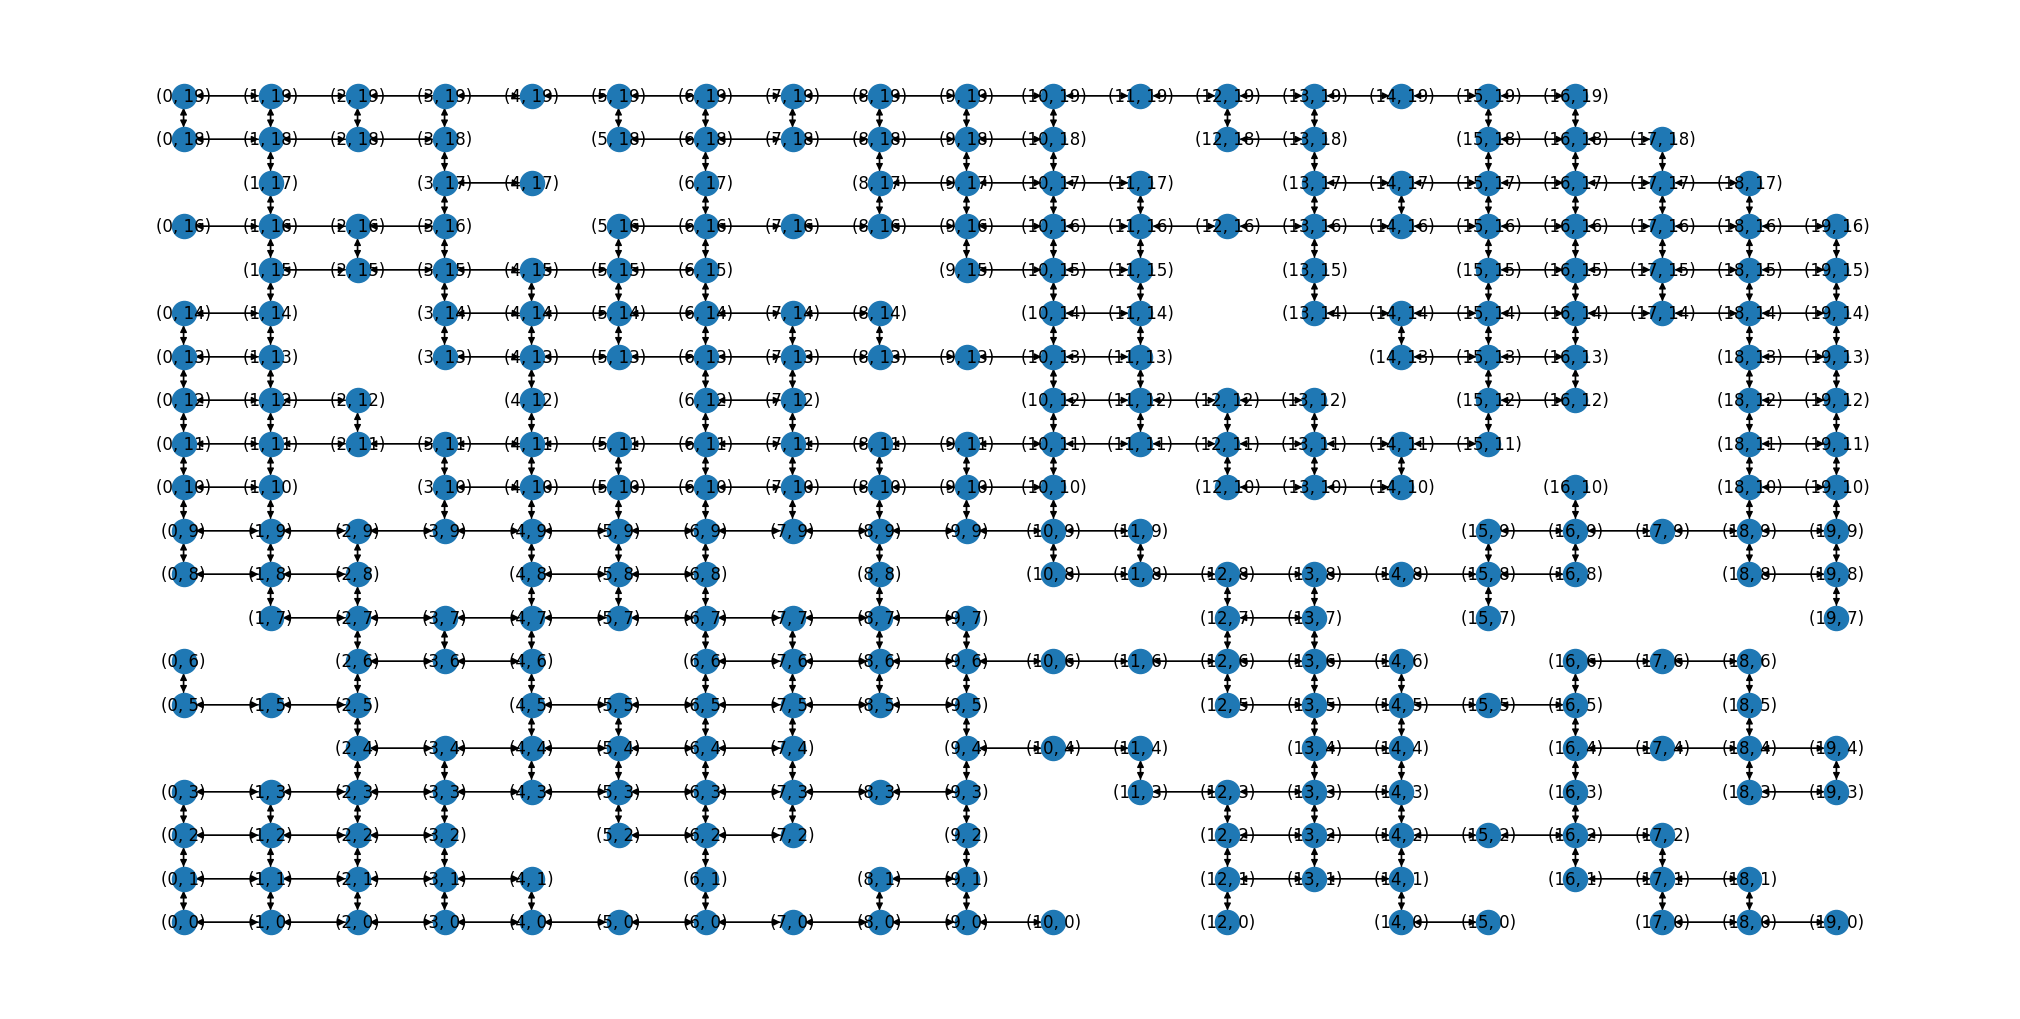

In [6]:
# Just to visualize the environment
Graph(environment).draw_graph()